In [1]:
# !pip install nltk

In [2]:
# libraries to display dataframe and images
from IPython.display import display
from PIL import Image
# matplotlib for vizualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# inbuild library to work with textual data
import string
# Setting up the NLTK to pre-processing textual data
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize

#Run this for the first time

# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('tagsets')
# nltk.download('universal_tagset')
# nltk.download('treebank')

In [56]:
import numpy as np
import pandas as pd
import spacy
from spacy import displacy

# reading the csv data file
articles = pd.read_csv("data/medium_articles_v3.csv")
display(articles.head(10))
print("Shape of dataframe : {}".format(articles.shape))

,link,title,sub_title,author,reading_time,text,id
0,https://towardsdatascience.com/ensemble-method...,"Ensemble methods: bagging, boosting and stacking",Understanding the key concepts of ensemble lea...,Joseph Rocca,20,This post was co-written with Baptiste Rocca.\...,1
1,https://towardsdatascience.com/understanding-a...,Understanding AUC - ROC Curve,"In Machine Learning, performance measurement i...",Sarang Narkhede,5,"In Machine Learning, performance measurement i...",2
2,https://towardsdatascience.com/how-to-work-wit...,How to work with object detection datasets in ...,"A comprehensive guide to defining, loading, ex...",Eric Hofesmann,10,Microsoft's Common Objects in Context dataset ...,3
3,https://towardsdatascience.com/11-dimensionali...,11 Dimensionality reduction techniques you sho...,Reduce the size of your dataset while keeping ...,Rukshan Pramoditha,16,"In both Statistics and Machine Learning, the n...",4
4,https://towardsdatascience.com/the-time-series...,The Time Series Transformer,Attention Is All You Need they said. Is it a m...,Theodoros Ntakouris,6,Attention Is All You Need they said. Is it a m...,5
5,https://netflixtechblog.com/learning-a-persona...,Learning a Personalized Homepage,how to best tailor each member's homepage to m...,Netflix Technology Blog,15,by Chris Alvino and Justin Basilico\nAs we've ...,6
6,https://towardsdatascience.com/6-data-science-...,6 Data Science Certificates To Level Up Your C...,Pump up your portfolio and get closer to your ...,Sara A. Metwalli,6,Because of the appeal of the field of data sci...,7
7,https://towardsdatascience.com/transformers-ex...,Transformers Explained Visually (Part 2): How ...,A Gentle Guide to the Transformer under the ho...,Ketan Doshi,11,This is the second article in my series on Tra...,8
8,https://medium.com/coders-camp/60-python-proje...,60 Python Projects with Source Code,60 Python Projects with Source code solved and...,Aman Kharwal,2,Python has been in the top 10 popular programm...,9
9,https://towardsdatascience.com/geometric-found...,Geometric foundations of Deep Learning,Geometric Deep Learning is an attempt to unify...,Michael Bronstein,13,This blog post was co-authored with Joan Bruna...,10


Shape of dataframe : (208, 7)


In [5]:
articles.describe(include='all')

,link,title,sub_title,author,reading_time,text,id
count,208,208,208,208,208.000000,208,208.000000
unique,208,208,204,179,NaN,208,NaN
top,https://towardsdatascience.com/ensemble-method...,"Ensemble methods: bagging, boosting and stacking",Update: This article is part of a series. Chec...,Adam Geitgey,NaN,This post was co-written with Baptiste Rocca.\...,NaN
freq,1,1,4,5,NaN,1,NaN
mean,NaN,NaN,NaN,NaN,12.375000,NaN,107.091346
std,NaN,NaN,NaN,NaN,13.880224,NaN,62.575453
min,NaN,NaN,NaN,NaN,2.000000,NaN,1.000000
25%,NaN,NaN,NaN,NaN,6.000000,NaN,52.750000
50%,NaN,NaN,NaN,NaN,9.000000,NaN,107.500000
75%,NaN,NaN,NaN,NaN,13.000000,NaN,162.250000


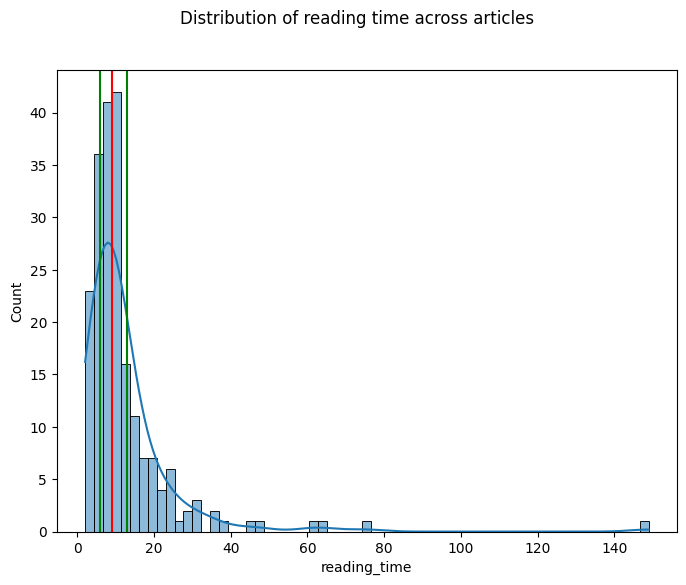

In [6]:
# ditsribution of reading times in our corpus
fig, axes = plt.subplots(figsize = (8, 6))
# creating histograms
sns.histplot(articles["reading_time"], kde=True, ax = axes)
# Computing percentile of the reading_time data.
first_q = np.percentile(articles["reading_time"], 25)
# Computing median (50th percentile) of the reading_time data.
second_q = np.percentile(articles["reading_time"], 50)
third_q = np.percentile(articles["reading_time"], 75)
# green lines for 25th and 75th percentile
plt.axvline(first_q, color = "green")
# red line for median reading_time
plt.axvline(second_q, color = "red")
plt.axvline(third_q, color = "green")
# plot title
plt.suptitle("Distribution of reading time across articles")
plt.show()

* Graph is clearly right skewed.
* Most of the articles have less reading time, with some having reading time in hours.
* The median reading time is 9 minutes.

**How does the reading time related with the article length?**

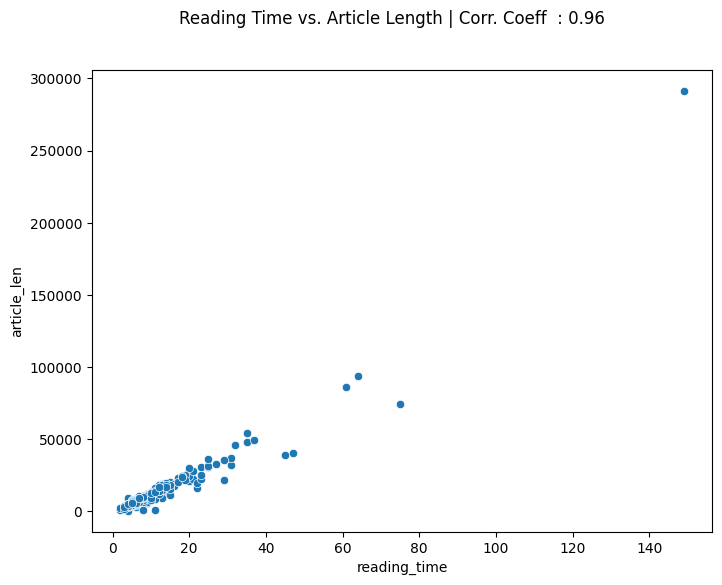

In [7]:
from scipy.stats import pearsonr

articles["article_len"] = articles["text"].apply(lambda x : len(x))
# creating scatterplot
fig, axes = plt.subplots(figsize = (8, 6))
sns.scatterplot(x = articles["reading_time"], y = articles["article_len"])
# Pearson correlation coefficient measures the linear relationship between two set of values.
corr_coeff, _ = pearsonr(articles["reading_time"], articles["article_len"])
# plot title
plt.suptitle("Reading Time vs. Article Length | Corr. Coeff  : {}".format(round(corr_coeff, 2)))
plt.show()

Reading time and article length is correlated.

**Do writers usually writes articles on the similar topics?**

In [8]:
for author, count in dict(articles['author'].value_counts()).items():
    if (count<2):
        continue
    print("Articles by {} :".format(author))
    for title in articles[articles['author']==author]['title'].values:
        print(title)
    print("--"*140)

Articles by Adam Geitgey :
Machine Learning is Fun Part 5: Language Translation with Deep Learning and the Magic of Sequences
Machine Learning is Fun! Part 4: Modern Face Recognition with Deep Learning
Machine Learning is Fun! Part 3: Deep Learning and Convolutional Neural Networks
Machine Learning is Fun! Part 2
Machine Learning is Fun Part 6: How to do Speech Recognition with Deep Learning
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Articles by Joseph Rocca :
Ensemble methods: bagging, boosting and stacking
Understanding Variational Autoencoders (VAEs)
Understanding Generative Adversarial Networks (GANs)
-----------------------------------------------------------------------------------------------------------------------------------------------------

* In the data that we have, it does seem that authors tend to write multiple articles on the same topic.
* And there are multiple authors writing on the same topic.

**DATA PREPROCESSING - TEXT**

Contractions : These are the shortened word of english words or phrases.
Issues : Computer does not understand these type of special characters. 
Solution : Contractions are required to be expanded, so that there meaning can be interpreted by the computer.
How? : There are couple of ways to achieve it, 
1. To create a mapping of contractions and there corresponding expansions.
2. To use modules/repos for achieving the same.

In [9]:
import re
# creating custom mapping
custom_mapping = {
    "n't" : " not",
    "'re" : " are",
    "'ve" : " have",
    "'ll" : " will",
    "'m" : " am",
    "'s" : " is"
}
# sample data
sample_text = """
I've decided to go to the party after all. I'll reach by 05:00 PM.
He's not coming with us.
It's his birthday and he has other plans.
They've thought about going to the movies.
I won't be going to movies.
"""
expanded_text = sample_text
for x in custom_mapping.keys():
    expanded_text = re.sub(x, custom_mapping[x], expanded_text)

print(expanded_text)


I have decided to go to the party after all. I will reach by 05:00 PM.
He is not coming with us.
It is his birthday and he has other plans.
They have thought about going to the movies.
I wo not be going to movies.



In [10]:
# Approach 2
# !pip install contractions

In [11]:
import contractions

expanded_text = contractions.fix(sample_text)
print(expanded_text)


I have decided to go to the party after all. I will reach by 05:00 PM.
He is not coming with us.
It is his birthday and he has other plans.
They have thought about going to the movies.
I will not be going to movies.



**How do we represent text as numbers?**

**One hot encoding** -> A vocabulary is created which is simply a set of all the unique words in the documents. Then each word in the document would be represented against the vocabulary as 0 and 1.

In [12]:
from sklearn.preprocessing import OneHotEncoder
import itertools
# two example documents
docs = ["cat","dog","bat","ate","lion","dog","bat"]
# split documents to tokens
tokens_docs = [doc.split(" ") for doc in docs]
# convert list of of token-lists to one flat list of tokens
# and then create a dictionary that maps word to id of word,
all_tokens = itertools.chain.from_iterable(tokens_docs)
word_to_id = {token: idx for idx, token in enumerate(set(all_tokens))}
# convert token lists to token-id lists
token_ids = [[word_to_id[token] for token in tokens_doc] for tokens_doc in tokens_docs]
# convert list of token-id lists to one-hot representation
vec = OneHotEncoder(categories="auto")
X = vec.fit_transform(token_ids)
print(X.toarray())

[[0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]]


Well, One hot encoding is one way of representing the text into numbers. But it is not the ideal way, and it has its own drawbacks.
1. **Can not measure the importance of a word** in the sentence. Only understand the mere presence/absence of word in a sentence.
2. **High dimensional sparse matrix representation** can be memory & computationally expensive.
3. **Explosion of feature space** if the number of categories are high.
4. The vector representation of words is orthogonal and cannot determine or measure the relationship between different words.


**Approach 2** : Bag of words (BOW)

Put words in a bag and computers the frequency of occurences if each word.


Step 1 : Create a vocabulary from the corpus. For ex. lets consider the three text below:

1. It was the best of times
2. It was the worst of times
3. It was the age of wisdom and the age of foolishness

Vocab for the same would be ;

* it 
* was
* the
* best
* of 
* times
* worst
* age
* wisdom
* and
* foolishness

In [13]:
# !pip install nltk==3.8.1

In [14]:
corpus = [
    "it was the best of times",
    "it was the worst of times",
    "it was the age of wisdom and the age of foolishness"
]

def get_bow_representation(corpus, frequency = True):
    vocabulary = set([x for x in " ".join(corpus).lower().split(" ")])

    bow_rep = []
    for sentence in corpus:
        sentence_rep = dict([(v,0) for v in vocabulary])
        for word in word_tokenize(sentence.lower()):
            if frequency:
                sentence_rep[word] +=1
            else:
                sentence_rep[word] = 1

        bow_rep.append(sentence_rep)
    return bow_rep



In [15]:
bow_representation = get_bow_representation(corpus, True)
df = pd.DataFrame(bow_representation)
df.index = corpus

**Using Sklearn CountVectorizer**

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words="english")
bow_rep = cv.fit_transform(corpus).todense()

df = pd.DataFrame(bow_rep)
df.columns = cv.get_feature_names_out()
df.index  = corpus

df

,age,best,foolishness,times,wisdom,worst
it was the best of times,0,1,0,1,0,0
it was the worst of times,0,0,0,1,0,1
it was the age of wisdom and the age of foolishness,2,0,1,0,1,0


**Drawbacks**

1. It can not distinguish between the rare important words and the common words.
2. This method ignores the location information of the word. It is not possible to grasp the meaning of a word in this representation.

**Solution** - Advanced BOW ( TFIDF )

TF-IDF is mainly composed of two components - Term Frequency(TF) & IDF (Inverse Document Frequency) 

* Term Frequency(TF) measures how important a word is in the document.
* Most common word would have higher frequency, and this is followed for all the words in the document.

In [17]:

corpus = [
    "data is the new oil of the century",
    "data is the root of all intelligence",
    "data is the language of patterns and the language of prediction"
]

def get_term_frequency(corpus):
    vocabulary = set([x for x in " ".join(corpus).lower().split(" ")])

    tf_list = []

    for sentence in corpus:
        sentence_tf = dict([(v,0) for v in vocabulary])

        for word in word_tokenize(sentence.lower()):
            sentence_tf[word] +=1
        for v in vocabulary:
            sentence_tf[v] /= len(word_tokenize(sentence.lower()))

        tf_list.append(sentence_tf)

    return tf_list

term_frequency = get_term_frequency(corpus)
df = pd.DataFrame(term_frequency)
df.index = corpus
display(df)

,root,all,century,prediction,intelligence,and,of,new,language,is,patterns,data,oil,the
data is the new oil of the century,0.000000,0.000000,0.125,0.000000,0.000000,0.000000,0.125000,0.125,0.000000,0.125000,0.000000,0.125000,0.125,0.250000
data is the root of all intelligence,0.142857,0.142857,0.000,0.000000,0.142857,0.000000,0.142857,0.000,0.000000,0.142857,0.000000,0.142857,0.000,0.142857
data is the language of patterns and the language of prediction,0.000000,0.000000,0.000,0.090909,0.000000,0.090909,0.181818,0.000,0.181818,0.090909,0.090909,0.090909,0.000,0.181818


In [18]:
def get_inverse_document_frequency(corpus):
    vocabulary = set([x for x in " ".join(corpus).lower().split(" ")])
    n = len(corpus)

    inverse_document_frequency = {}
    for v in vocabulary:
        num_docs = 0
        for sentence in corpus:
            if v in word_tokenize(sentence.lower()):
                num_docs += 1
        inverse_document_frequency[v] = np.log(n/num_docs)
    return inverse_document_frequency

inverse_document_frequency = get_inverse_document_frequency(corpus)
inverse_document_frequency

{'root': np.float64(1.0986122886681098),
 'all': np.float64(1.0986122886681098),
 'century': np.float64(1.0986122886681098),
 'prediction': np.float64(1.0986122886681098),
 'intelligence': np.float64(1.0986122886681098),
 'and': np.float64(1.0986122886681098),
 'of': np.float64(0.0),
 'new': np.float64(1.0986122886681098),
 'language': np.float64(1.0986122886681098),
 'is': np.float64(0.0),
 'patterns': np.float64(1.0986122886681098),
 'data': np.float64(0.0),
 'oil': np.float64(1.0986122886681098),
 'the': np.float64(0.0)}

In [19]:
def get_tf_idf(corpus):
    tf = get_term_frequency(corpus)
    idf = get_inverse_document_frequency(corpus)

    tf_idf = []
    for tf_dict in tf:
        tf_idf_sentence = {}
        for t, term_freq in tf_dict.items():
            tf_idf_sentence[t] = term_freq * idf[t]
        tf_idf.append(tf_idf_sentence)

    return tf_idf

tf_idf = get_tf_idf(corpus)
df = pd.DataFrame(tf_idf)
df.index = corpus
display(df)

,root,all,century,prediction,intelligence,and,of,new,language,is,patterns,data,oil,the
data is the new oil of the century,0.000000,0.000000,0.137327,0.000000,0.000000,0.000000,0.0,0.137327,0.000000,0.0,0.000000,0.0,0.137327,0.0
data is the root of all intelligence,0.156945,0.156945,0.000000,0.000000,0.156945,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
data is the language of patterns and the language of prediction,0.000000,0.000000,0.000000,0.099874,0.000000,0.099874,0.0,0.000000,0.199748,0.0,0.099874,0.0,0.000000,0.0


**Using Tfidf module**

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
model = tfidf.fit_transform(corpus).todense()
df = pd.DataFrame(model)
df.columns = tfidf.get_feature_names_out()
df.index = corpus
display(df)

,all,and,century,data,intelligence,is,language,new,of,oil,patterns,prediction,root,the
data is the new oil of the century,0.000000,0.000000,0.428676,0.253183,0.000000,0.253183,0.000000,0.428676,0.253183,0.428676,0.000000,0.000000,0.000000,0.506366
data is the root of all intelligence,0.476986,0.000000,0.000000,0.281715,0.476986,0.281715,0.000000,0.000000,0.281715,0.000000,0.000000,0.000000,0.476986,0.281715
data is the language of patterns and the language of prediction,0.000000,0.308779,0.000000,0.182370,0.000000,0.182370,0.617558,0.000000,0.364740,0.000000,0.308779,0.308779,0.000000,0.364740


Summary TF-IDF

* Computes the feature importances of a word in the document of a corpus.
* It can detect and nullify the effects of stopwords on feature vector of a sentence.
* Builds over CountVectorizer to penalize the occurence of highly recurring terms and low-frequency terms in a corpus.
* IDF aims to reduce noise in the matrix.


**DRAWBACK**

* For a large corpus the vocab can be huge which in turns can increase the computational load as well as storage would be challenging as well.
* TFIDF only considers the presence/absence of words in document, not the contextual meaning.

**How do we measure the difference between the two words?**

Using Euclidean Distance and Cosine Similarity

**Euclidean Distance**

$$euclidean \hspace{0.1cm} distance = \sqrt{\sum_{i}^{N}(X_i - Y_i)^2 }$$


Here, X and Y are two vectors, and N is the size of the vector.

**Cosine Distance = 1 - Cosine Similarity**

Cosine Similarity only depends upon the angle between the vectors not on the magnitude. Value ranges from -1 to 1. Two vectors which lie on the line ($\theta = 0$) have a cosine similarity of 1, and vectors which lie in opposite direction to each other ($\theta = 180$) have a cosine similarity of -1.

**Cosine Distance value ranges from 0-2**




**Which to use when?**

When the magnitude doesn't matter, its ideal to use cosine similarity. For example, In the cases of textual representation using something like BOW, a word like "cricket" might be present 50 times in one document which has 1000 words, and 5 times in another document with 100 words. It we calculate the distance using euclidean metric, we might not find the two documents very similar. But this is because of the difference in the length between the 2 documents. Cosine similarity accounts for this very well as this does not look at the magnitude but the angle between the documents (represented by vectors). And here, even though the difference in magnitude is high, the angle will be small.

Given the 3 words (king, man and water), all represented using BOW vectors, lets try and find the distance between them using cosine distance metric.

In [21]:
king = [1, 0, 0]
man = [0, 1, 0]
water = [0, 0, 1]

def cosine_distance(x,y):
    return 1 - np.dot(x,y)/(np.sqrt(np.dot(x,x)) * np.sqrt(np.dot(y,y)))

In [22]:
print("Cosine Distance between, King and man",cosine_distance(king,man))
print("Cosine Distance between, King and water", cosine_distance(king,man))
print("Cosine Distance between, man and water", cosine_distance(king,man))

Cosine Distance between, King and man 1.0
Cosine Distance between, King and water 1.0
Cosine Distance between, man and water 1.0


**PREPROCESSING**

Using spacy

In [23]:
def process_sentence(sentence, nlp_object):
    # Convert to lowercase
    sentence = sentence.lower()

    # Exapnding contractions
    sentence = contractions.fix(sentence)

    # Lemmatization and removing stopwords
    doc = nlp_object(sentence)
    sentence = " ".join([token.lemma_ for token in doc if not token.is_stop])

    # Remove punctuation
    for p in string.punctuation:
        sentence = sentence.replace(p, " ")
    sentence = re.sub(r"\s+", " ", sentence) # Replace all whitespace characters with space

    return sentence
    

In [26]:
from tqdm.notebook import tqdm
# tqdm to see real time progress
tqdm.pandas()

nlp = spacy.load('en_core_web_sm') # English pipeline optimized for CPU

def process_article(article_text, nlp_object):
    processed_article_sentences = []
    # using nltk sentence tokenizer
    for sentence in sent_tokenize(article_text):
        # preprocessing each sentence using our process_sentence function
        processed_article_sentences.append(process_sentence(sentence, nlp_object))
    # joining preprocessed sentence as a complete paragrams of the article
    return " ".join(processed_article_sentences)

articles["processed_text"] = articles["text"].progress_apply(lambda x : process_article(x, nlp))

  0%|          | 0/208 [00:00<?, ?it/s]

Let us check similarity between the document using cosine similarity


In [33]:
tfidf_vectorizer = TfidfVectorizer(min_df=5)
tfidf_features = tfidf_vectorizer.fit_transform(articles['processed_text']).todense()

tfidf_features_df = pd.DataFrame(tfidf_features)
tfidf_features_df.columns = tfidf_vectorizer.get_feature_names_out() 
tfidf_features_df["TITLE"] = articles["title"]
tfidf_features_df["ID"] = articles["id"]
display(tfidf_features_df)



,00,000,01,05,06,07,10,100,1000,101,...,youtube,zero,zhou,zip,zombie,zone,zoom,zuckerberg,TITLE,ID
0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,"Ensemble methods: bagging, boosting and stacking",1
1,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,Understanding AUC - ROC Curve,2
2,0.000000,0.0,0.0,0.0,0.019288,0.0,0.008322,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,How to work with object detection datasets in ...,3
3,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.006363,0.0,0.0,0.000000,0.000000,0.0,0.0,11 Dimensionality reduction techniques you sho...,4
4,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,The Time Series Transformer,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.015118,0.0,0.0,0.0,0.000000,0.0,0.006343,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,Type 2 Diabetes Reversal The Quick Start Guide,210
204,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.068679,0.0,0.0,How a 22 Day Water Fast Changed My Life,211
205,0.000000,0.0,0.0,0.0,0.000000,0.0,0.016279,0.0,0.0,0.0,...,0.0,0.021420,0.0,0.0,0.000000,0.000000,0.0,0.0,Breaking Your Fast,212
206,0.000000,0.0,0.0,0.0,0.000000,0.0,0.043596,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.021434,0.019230,0.0,0.0,11 Unusual Tips for How to Wake Up Early,213


In [35]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_tfidf_features = tsne.fit_transform(tfidf_features_df[tfidf_vectorizer.get_feature_names_out()].values)
tsne_tfidf_features_df = pd.DataFrame(tsne_tfidf_features)
tsne_tfidf_features_df.columns = ["C1", "C2"]
tsne_tfidf_features_df["TITLE"] = tfidf_features_df["TITLE"]
display(tsne_tfidf_features_df)

,C1,C2,TITLE
0,-11.093724,-7.871446,"Ensemble methods: bagging, boosting and stacking"
1,-17.218216,-10.603015,Understanding AUC - ROC Curve
2,-6.778526,-6.325544,How to work with object detection datasets in ...
3,-14.526843,-5.664369,11 Dimensionality reduction techniques you sho...
4,-6.692840,-12.157291,The Time Series Transformer
...,...,...,...
203,16.741882,-1.910820,Type 2 Diabetes Reversal The Quick Start Guide
204,15.058546,0.774221,How a 22 Day Water Fast Changed My Life
205,15.725264,-0.077236,Breaking Your Fast
206,10.183302,3.781816,11 Unusual Tips for How to Wake Up Early


In [39]:
import plotly.express as px
# scatter plot of t-sne for the BOW representation

title = "T-distributed Stochastic Neighbor Embedding for TFIDF document representation"

fig = px.scatter(tsne_tfidf_features_df, x="C1", y="C2", hover_data=['TITLE'], title=title)
fig.show()

In [51]:
from sklearn.metrics.pairwise import cosine_similarity

def get_similar_documents(all_article_rep_df, article_id, features):
    this_article_rep = all_article_rep_df[all_article_rep_df['ID']==article_id][features]
    other_article_rep = all_article_rep_df[all_article_rep_df['ID']!=article_id][features]

    similarity_matrix =   cosine_similarity(this_article_rep, other_article_rep)
    similar_articles = list(zip(similarity_matrix[0].tolist(), all_article_rep_df["TITLE"].tolist()))
    similar_articles = sorted(similar_articles, key = lambda x : x[0], reverse = True)
    print("Reference Article : {}".format(all_article_rep_df[all_article_rep_df["ID"] == article_id]["TITLE"].values[0]))

    print("**** Similar Articles ****")
    for score, title in similar_articles[:5]:
        print(title)
    print()



In [52]:
get_similar_documents(tfidf_features_df, 90, tfidf_vectorizer.get_feature_names_out())

Reference Article : 17 types of similarity and dissimilarity measures used in data science.
**** Similar Articles ****
9 Distance Measures in Data Science
17 Clustering Algorithms Used In Data Science and Mining
Machine Learning Basics with the K-Nearest Neighbors Algorithm
OVER 100 Data Scientist Interview Questions and Answers!
Fundamental Techniques of Feature Engineering for Machine Learning



**END**